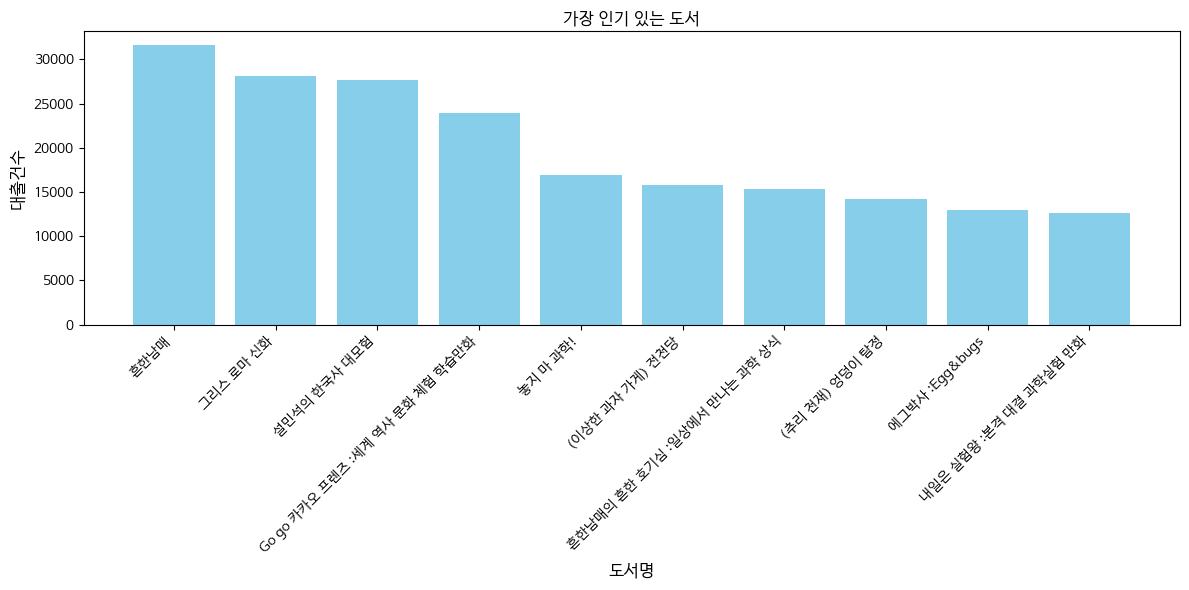

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 데이터 로드
file_path = r'C:\Users\user\Desktop\도서관_공모전\최종\1_API 호출\book_analysis_final.xlsx'
df = pd.read_excel(file_path, sheet_name=2)

# 도서별 대출 건수 집계
book_loans = df.groupby('도서명')['대출건수'].sum()

# 상위 도서 10개 추출
top_books = book_loans.nlargest(10).reset_index()

# 폰트 파일 경로 설정
font_path = r'C:\Windows\Fonts\Hancom Gothic Regular.ttf'

# 폰트 속성 생성
font_prop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib에서 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 시각화
plt.figure(figsize=(12, 6))
plt.bar(top_books['도서명'], top_books['대출건수'], color='skyblue')
plt.title('가장 인기 있는 도서', fontproperties=font_prop)
plt.xlabel('도서명', fontproperties=font_prop)
plt.ylabel('대출건수', fontproperties=font_prop)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # 레이아웃 조정

# PDF로 저장
pdf_path = r'C:\Users\user\Desktop\도서관_공모전\최종\1_API 호출\top_books_plot.pdf'
plt.savefig(pdf_path, format='pdf')

# 그래프 출력
plt.show()


In [2]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
from matplotlib.backends.backend_pdf import PdfPages

warnings.filterwarnings("ignore")

# 폰트 파일 경로 설정
font_path = r"C:\Users\user\Desktop\도서관_공모전\최종\H2GTRM.TTF"

# 폰트 속성 생성
font_prop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib에서 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드 (엑셀 파일 경로를 실제 파일 경로로 설정)
file_path =  r'C:\Users\user\Desktop\도서관_공모전\최종\1_API 호출\book_analysis_final.xlsx'
df = pd.read_excel(file_path, sheet_name=2)

# 연령대 및 성별에 따른 도서 대출 건수 집계
book_patterns = df.groupby(['도서명', '연령', '성별'])['대출건수'].sum().reset_index()

# 상위 5개 도서 추출 함수
def get_top_books(data, top_n=5):
    return data.groupby(['연령', '성별']).apply(lambda x: x.nlargest(top_n, '대출건수')).reset_index(drop=True)

# 상위 5개의 도서 데이터 추출
top_books = get_top_books(book_patterns)

# 상위 5개의 도서 시각화를 PDF로 저장
pdf_path = r'C:\Users\user\Desktop\도서관_공모전\최종\6_도서대출 패턴 분석\상위_5_도서.pdf'
with PdfPages(pdf_path) as pdf:
    for (age_group, gender), group_data in top_books.groupby(['연령', '성별']):
        plt.figure(figsize=(12, 6))
        sns.barplot(data=group_data, x='도서명', y='대출건수', palette='viridis')
        plt.title(f'{age_group} - {gender}의 상위 5 도서', fontproperties=font_prop)
        plt.xlabel('도서명', fontproperties=font_prop)
        plt.ylabel('대출건수', fontproperties=font_prop)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        pdf.savefig()  # 현재 페이지를 PDF에 저장
        plt.close()

# 연령대 및 성별에 따른 상위 5개 도서의 데이터 엑셀로 저장
excel_path = r'C:\Users\user\Desktop\도서관_공모전\최종\6_도서대출 패턴 분석\상위_5_도서.xlsx'
with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
    for (age_group, gender), group_data in top_books.groupby(['연령', '성별']):
        # 각 연령대 및 성별에 대한 시트를 생성
        sheet_name = f'{age_group}_{gender}'
        group_data.to_excel(writer, sheet_name=sheet_name, index=False)

print("PDF 및 엑셀 파일이 성공적으로 저장되었습니다.")


PDF 및 엑셀 파일이 성공적으로 저장되었습니다.


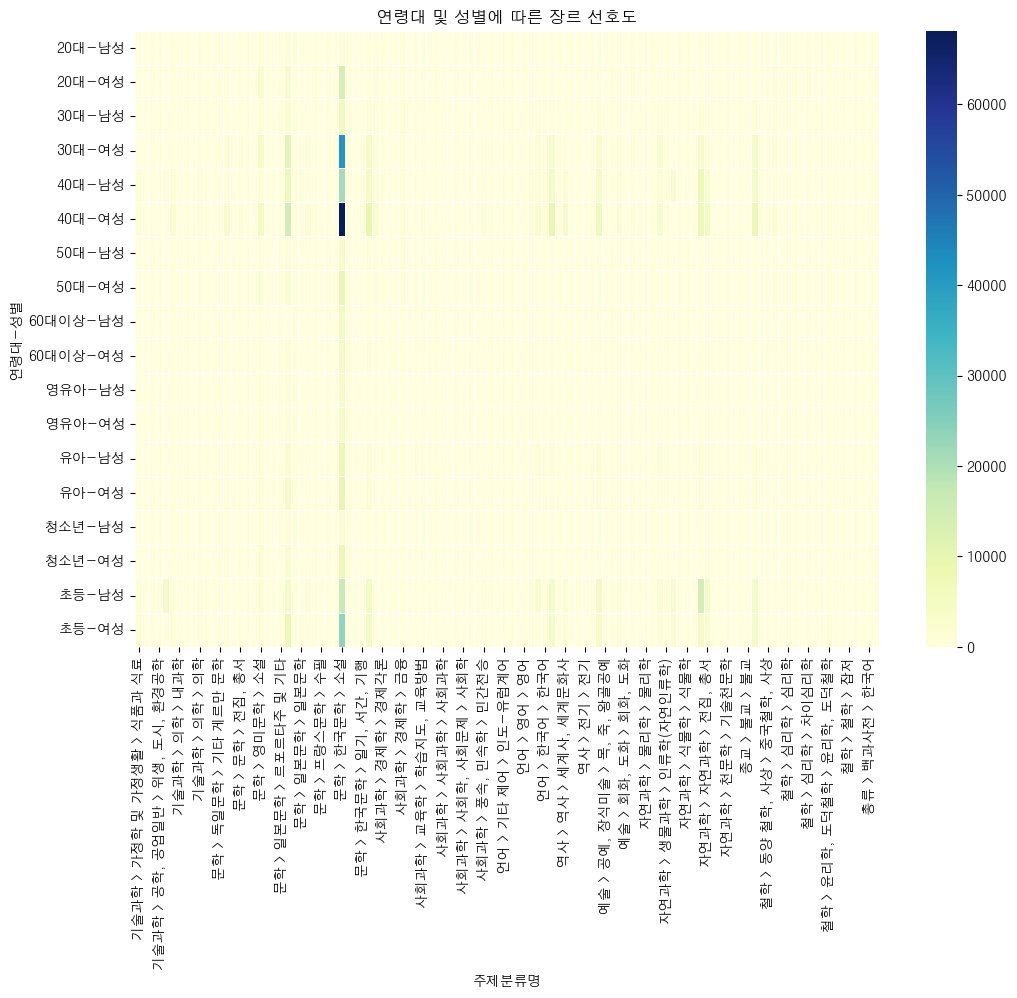

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd

# 폰트 파일 경로 설정
font_path = r"C:\Users\user\Desktop\도서관_공모전\최종\H2GTRM.TTF"

# 폰트 속성 생성
font_prop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib에서 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드 (엑셀 파일 경로를 실제 파일 경로로 설정)
file_path = r'C:\Users\user\Desktop\도서관_공모전\최종\1_API 호출\book_analysis_final.xlsx'
df = pd.read_excel(file_path, sheet_name=2)

# 연령대 문자열 처리
df['연령대'] = df['연령'].astype(str)

# 장르별 대출 건수 집계
genre_age_sex = df.groupby(['연령대', '성별', '주제분류명'])['대출건수'].sum().unstack().fillna(0)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(genre_age_sex, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('연령대 및 성별에 따른 장르 선호도')

# PDF로 저장
pdf_path = r"C:\Users\user\Desktop\도서관_공모전\최종\6_도서대출 패턴 분석\heat_map.pdf"
plt.savefig(pdf_path, format='pdf')

# 그래프를 화면에 표시
plt.show()


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import pandas as pd

# 폰트 파일 경로 설정
font_path = r"C:\Users\user\Desktop\도서관_공모전\최종\H2GTRM.TTF"

# 폰트 속성 생성
font_prop = fm.FontProperties(fname=font_path, size=12)

# Matplotlib에서 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 데이터 로드 (엑셀 파일 경로를 실제 파일 경로로 설정)
file_path = r'C:\Users\user\Desktop\도서관_공모전\최종\1_API 호출\book_analysis_final.xlsx'
df = pd.read_excel(file_path, sheet_name=2)

# 연령대 문자열 처리
df['연령대'] = df['연령'].astype(str)

# 장르별 대출 건수 집계
genre_age_sex = df.groupby(['연령대', '성별', '주제분류명'])['대출건수'].sum().unstack().fillna(0)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(genre_age_sex, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('연령대 및 성별에 따른 장르 선호도')
plt.savefig(r'C:\Users\user\Desktop\히트맵.png')  # PNG 파일로 저장
plt.close()

# 상위 3개의 주제분류명 추출
top_genres = df.groupby(['연령대', '성별', '주제분류명'])['대출건수'].sum().reset_index()
top_genres = top_genres.sort_values(by=['연령대', '성별', '대출건수'], ascending=[True, True, False])

# 각 연령대와 성별별로 상위 3개의 주제분류명을 추출
top_3_genres = top_genres.groupby(['연령대', '성별']).head(3).reset_index(drop=True)

# 상위 3개의 주제분류명 시각화를 PDF 파일로 저장
from matplotlib.backends.backend_pdf import PdfPages

pdf_path = r'C:\Users\user\Desktop\도서관_공모전\최종\6_도서대출 패턴 분석\상위_3_장르.pdf'
with PdfPages(pdf_path) as pdf:
    for (age_group, gender), group_data in top_3_genres.groupby(['연령대', '성별']):
        plt.figure(figsize=(10, 6))
        sns.barplot(data=group_data, x='주제분류명', y='대출건수', palette='viridis')
        plt.title(f'{age_group} - {gender}의 상위 3 장르')
        plt.xlabel('주제분류명')
        plt.ylabel('대출건수')
        plt.xticks(rotation=45)
        plt.tight_layout()
        pdf.savefig()  # 현재 페이지를 PDF에 저장
        plt.close()

# 상위 3개의 주제분류명 엑셀로 저장
top_3_genres.to_excel(r'C:\Users\user\Desktop\도서관_공모전\최종\6_도서대출 패턴 분석\상위_3_장르.xlsx', index=False)

print("PDF 및 엑셀 파일이 성공적으로 저장되었습니다.")

PDF 및 엑셀 파일이 성공적으로 저장되었습니다.
